In [4]:
!pip install beautifulsoup4

In [5]:
!pip install newspaper3k
!pip install konlpy

     |████████████████████████████████| 211 kB 5.8 MB/s 
     |████████████████████████████████| 87 kB 5.0 MB/s 
     |████████████████████████████████| 81 kB 8.6 MB/s 
     |████████████████████████████████| 7.4 MB 25.2 MB/s 
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=13553 sha256=1a70da70c27a219fd7065f6485e8a16a57a37dd5afe8b4d0ab9e29fd3c17b3e2
  Stored in directory: /root/.cache/pip/wheels/df/67/41/faca10fa501ca010be41b49d40360c2959e1c4f09bcbfa37fa
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-py3-none-any.whl size=3357 sha256=5dbfab880e85157cfba3efa2ffa719dd36786161039b42586c33f4056fe7e727
  Stored in directory: /root/.cache/pip/wheels/7f/d4/8f/6e2ca54744c9d7292d88ddb8d42876bcdab5e6d84a21c10346
  Created wheel for jieba3k: filename=jieba3k-0.35.1-py3-none-any.whl size=7398404 sha256=53222ed1d7e4790bec773a2976449afedafa8689d2461d9629008d591df28481
  Stored in directory: /root/.cache/pip/wheels/4c/91/46/3c208287b726df325a597957432

In [6]:
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git 
%cd Mecab-ko-for-Google-Colab/
!bash install_mecab-ko_on_colab190912.sh
%cd ../

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 109, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 109 (delta 7), reused 10 (delta 3), pack-reused 91
Receiving objects: 100% (109/109), 1.27 MiB | 1.99 MiB/s, done.
Resolving deltas: 100% (46/46), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2022-03-22 02:41:02--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22c5:2ef4, 2406:da00:ff00::3403:4be7, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://bbuseruploads.s3.amazonaws.com/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz?Signature=UTuWEP

In [7]:
!nvidia-smi

Tue Mar 22 02:45:18 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8    27W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [8]:
from konlpy.tag import Mecab
mecab = Mecab()
mecab.morphs('하하하하하하하ㅏㅏ하하핳핳ㅎ하하')

['하하하하', '하하', '하', 'ㅏㅏ하하핳핳ㅎ하하']

#BeautifulSoup 사용법

In [9]:
from bs4 import BeautifulSoup

In [10]:
html='''
<html>
  <head>
  </head>
  <body>
    <h1>장바구니
      <p id = 'clothes' class='name' title='라운드티'> 라운드티
        <span clss='number'>25</span>
        <span clss='price'>25000</span>
        <span clss='menu'>의류</span>
        <a herf = "http://www.naver.com">바로가기</a>
      </p>
      <p id = 'watch' class='name' title='시계'> 시계
        <span class='number'> 28 </span>
        <span class='price'> 32000 </span>
        <span class='menu'> 악세사리 </span>
        <a href = "http://www.facebook.com"> 바로가기 </a>
      </p>
    </h1>
  </body>
</html>
'''

In [11]:
soup = BeautifulSoup(html, 'html.parser')

In [12]:
print(soup.select('body'))

[<body>
<h1>장바구니
      <p class="name" id="clothes" title="라운드티"> 라운드티
        <span clss="number">25</span>
<span clss="price">25000</span>
<span clss="menu">의류</span>
<a herf="http://www.naver.com">바로가기</a>
</p>
<p class="name" id="watch" title="시계"> 시계
        <span class="number"> 28 </span>
<span class="price"> 32000 </span>
<span class="menu"> 악세사리 </span>
<a href="http://www.facebook.com"> 바로가기 </a>
</p>
</h1>
</body>]


In [13]:
print(soup.select('p'))

[<p class="name" id="clothes" title="라운드티"> 라운드티
        <span clss="number">25</span>
<span clss="price">25000</span>
<span clss="menu">의류</span>
<a herf="http://www.naver.com">바로가기</a>
</p>, <p class="name" id="watch" title="시계"> 시계
        <span class="number"> 28 </span>
<span class="price"> 32000 </span>
<span class="menu"> 악세사리 </span>
<a href="http://www.facebook.com"> 바로가기 </a>
</p>]


In [14]:
print(soup.select('h1 .name .menu'))

[<span class="menu"> 악세사리 </span>]


In [15]:
print(soup.select('html > h1'))

[]


In [16]:
print(soup.select('html h1'))

[<h1>장바구니
      <p class="name" id="clothes" title="라운드티"> 라운드티
        <span clss="number">25</span>
<span clss="price">25000</span>
<span clss="menu">의류</span>
<a herf="http://www.naver.com">바로가기</a>
</p>
<p class="name" id="watch" title="시계"> 시계
        <span class="number"> 28 </span>
<span class="price"> 32000 </span>
<span class="menu"> 악세사리 </span>
<a href="http://www.facebook.com"> 바로가기 </a>
</p>
</h1>]


In [17]:
from newspaper import Article

In [18]:
url = 'https://news.naver.com/main/read.naver?mode=LSD&mid=sec&sid1=101&oid=030&aid=0002881076'

In [19]:
article = Article(url, language = 'ko')
article.download()
article.parse()

In [20]:
print('기사 제목:')
print(article.title)
print('')
print('기사 내용:')
print(article.text)

기사 제목:
[AI 사피엔스 시대]자연어처리 기술, 컴퓨팅 파워 경쟁 시대로

기사 내용:
[Copyright ⓒ 전자신문 & 전자신문인터넷, 무단전재 및 재배포 금지]

주로 아이디어와 기술력으로 경쟁했던 자연어처리 인공지능(AI) 분야는 점차 컴퓨팅 파워 싸움으로 무게 추가 이동하고 있다. 모델이 대형화되면서 향상된 퍼포먼스 확보에 필요한 자금 규모도 커지고 있다. 자칫 대기업 자본력에 휘둘릴 수 있다는 우려도 함께 나온다.자연어처리(NLP)는 인간이 사용하는 언어 체계를 기계가 인식하도록 알고리즘을 디자인하는 기술이다. 흔히 말하는 컴퓨터 혹은 인간과 대화하는 컴퓨터 관련 기술이 포함된다.목적에 따라 세 가지 카테고리로 나뉜다. 인간이 제기한 질문에 자동으로 적절한 답을 찾아주는 '질의응답(QA)', 원하는 업무를 지시했을 때 작업을 수행하는 '테스크 컴플리션', 그리고 특별한 목적이 없는 대화를 의미하는 '오픈도메인 컨버세이션(비목적성 대화)'이 있다. 각기 발전해왔던 세 가지 기술은 지난 2018년 구글의 인공지능 언어모델 '버트(BERT)'의 등장으로 패러다임이 전환됐다. 압도적인 성능으로 대량의 프리트레이닝(사전학습)이 가능해지면서 굳이 셋을 구분할 필요가 없어진 것이다.기계학습 연구에서 모델을 학습할 때는 지도학습과 비지도학습, 강화학습 중 하나를 골라 활용한다. 지도학습은 사람이 적절한 입력과 출력을 부여하는 방식이다. 정답이 정해져 있고 기계의 정답률도 쉽게 측정할 수 있다. 반면에 비지도학습은 정답이 정해지지 않은 데이터에 대해서도 기계가 스스로 클러스터링 등을 통해 학습한다. 체계화되지 않은 대량의 데이터를 학습 가능하지만 학습이 맞게 됐는지 확인하기 어렵다.버트는 기존 AI 학습 방법을 혁신적으로 바꿔놨다는 평가를 받는다. 자연어처리를 교사 없이 양방향으로 사전 학습하는 최초의 시스템이다. 비지도학습 방식을 사용하면서도 기존 존재했던 어떤 기술보다 뛰어난 성능을 보여준다. 최근 1년 반 동안 버트를 필두로 AI 모델은 급격히 대형화되는 

# BeautifulSoup와 newspaper3k를 통해 크롤러 만들기

In [21]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

In [22]:
def make_urllist(page_num, code, date):
    urllist = []
    for i in range(1, page_num + 1):
        url = 'https://news.naver.com/main/list.nhn?mode=LSD&mid=sec&sid1='+str(code)+'&date='+str(date)+'&page='+str(i)
        headers = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/54.0.2840.90 Safari/537.36'}
        news = requests.get(url, headers=headers)

        soup = BeautifulSoup(news.content, 'html.parser')

        # CASE 1
        news_list = soup.select('.newsflash_body .type06_headline li dl')

        # CASE 2
        news_list.extend(soup.select('.newsflash_body .type06 li dl'))

        # 각 뉴스로부터 a 태그인 <a href='주소'>에서 '주소'만을 가져옵니다.
        for line in news_list:
            urllist.append(line.a.get('href'))
    return urllist

In [23]:
url_list = make_urllist(2, 101, 20200506) # 경제코드 101
print('뉴스 기사의 갯수 :', len(url_list))

뉴스 기사의 갯수 : 40


In [24]:
url_list[:5]

['https://news.naver.com/main/read.naver?mode=LSD&mid=sec&sid1=101&oid=057&aid=0001451723',
 'https://news.naver.com/main/read.naver?mode=LSD&mid=sec&sid1=101&oid=057&aid=0001451721',
 'https://news.naver.com/main/read.naver?mode=LSD&mid=sec&sid1=101&oid=057&aid=0001451718',
 'https://news.naver.com/main/read.naver?mode=LSD&mid=sec&sid1=101&oid=003&aid=0009849190',
 'https://news.naver.com/main/read.naver?mode=LSD&mid=sec&sid1=101&oid=057&aid=0001451717']

In [25]:
idx2word = {'101':'경제', '102':'사회', '103':'생활/문화', '105':'IT/과학'}

In [26]:
def make_data(urllist, code):
    text_list = []
    for url in urllist:
        article = Article(url, language='ko')
        article.download()
        article.parse()
        text_list.append(article.text)

    # 데이터 프레임의 'news' 키 아래 파싱한 텍스트를 벨류로 붙여줍니다.
    df = pd.DataFrame({'news' : text_list})

    # 데이터 프레임의 'code'키 아래 한글 카테고리명을 붙여줍니다.
    df['code'] = idx2word[str(code)]
    return df

In [27]:
data = make_data(url_list, 101)

In [28]:
data[:40]

,news,code
0,고려은단이 5월을 맞아 응원 메시지를 공유하는 ‘5월 5글자로 응원 부탁해!’ 이벤...,경제
1,코리아나화장품의 민감성 피부를 위한 저자극 스킨케어 브랜드 '프리엔제'가 마르고 건...,경제
2,서울장수주식회사가 부드럽고 달콤한 맛으로 인기를 모으고 있는 생막걸리 ‘인생막걸리’...,경제
3,[서울=뉴시스] 오동현 기자 = 모바일 게임 기업 컴투스는 3D 모바일 야구 게임 ...,경제
4,대원제약이 2020년 상반기 신입과 경력 정기 공채를 실시합니다.정기 공채 모집분야...,경제
5,"[AFP=연합뉴스] [AFP=연합뉴스]\n\n""요즘은 잔인한 날""…리프트도 앞서 9...",경제
6,이재용 삼성전자 부회장이 6일 삼성전자 서울 서초사옥에서 대국민 사과 회견을 하기 ...,경제
7,JW중외제약이 A형 혈우병 예방요법제 ‘헴리브라피하주사를 출시하고 본격적인 마케팅 ...,경제
8,"옵티팜과 휴벳바이오가 공동 개발중인 백신 후보 물질에 대해 마우스, 기니피그, 미니...",경제
9,[한국경제TV 신동호 기자]\n\n전남 나주시와 충북 청주시가 방사광 가속기 구축사...,경제


# 데이터 수집 및 전처리

In [29]:
code_list = [102,103,105]
code_list

[102, 103, 105]

In [30]:
def make_total_data(page_num, code_list, date):
    df = None

    for code in code_list:
        url_list = make_urllist(page_num, code, date)
        df_temp = make_data(url_list, code)
        print(str(code) + '번 코드에 대한 데이터를 만들었습니다.')

        if df is not None:
            df = pd.concat([df, df_temp])
        else:
            df = df_temp
    return df

In [31]:
df = make_total_data(1, code_list, 20200506)

102번 코드에 대한 데이터를 만들었습니다.
103번 코드에 대한 데이터를 만들었습니다.
105번 코드에 대한 데이터를 만들었습니다.


In [32]:
df.sample(10) #각 20개 총 60개 중 랜덤하게 뉴스를 출력

,news,code
1,"[AFP=연합뉴스] [AFP=연합뉴스]\n\n""요즘은 잔인한 날""…리프트도 앞서 9...",IT/과학
10,기사 섹션 분류 안내\n\n기사의 섹션 정보는 해당 언론사의 분류를 따르고 있습니다...,생활/문화
3,[KBS 청주][앵커]충청북도가 한 차례 고배를 마셨던 방사광 가속기 유치에 다시 ...,IT/과학
12,동영상 뉴스\n\n[앵커]다음 주 고등학교 3학년부터 순차적인 등교수업이 시작되는데...,사회
10,안병용 의정부시장 이천화재 희생자 합동분향소 헌화. 사진제공=의정부시 안병용 의정부...,사회
3,©아가타 파리(AGATHA PARIS) ©아가타 파리(AGATHA PARIS)\n\...,생활/문화
2,나는 지난 30여년간 ‘협력(協力)’이라는 말을 매일 마주하며 살고 있다. 남북관계...,생활/문화
4,지난 2016년 포항공대에 구축한 4세대 선형 방사광가속기. /연합뉴스 지난 201...,IT/과학
13,38명의 사망자가 발생한 경기 이천 물류창고 화재 현장에서 6일 경찰과 소방 등 관...,사회
6,[서울=뉴시스] 오동현 기자 = 펍지주식회사가 올해 첫 '플레이어언노운스 배틀그라운...,IT/과학


In [33]:
# df = make_total_data(100, code_list, 20200506) #100페이지의 뉴스 정보를 크롤링(2000개 뉴스)

In [34]:
# # 해당 경로에 csv 저장하는 코드
# csv_path = '/content/drive/MyDrive/NLP/dataset/news_data.csv'
# df.to_csv(csv_path, index=False)

In [40]:
# 해당 경로에서 csv 읽어오는 코드
csv_path = '/content/drive/MyDrive/NLP/dataset/news_data.csv'
df = pd.read_table(csv_path, sep=',')
df.head()

,news,code
0,파주시청. 사진제공=파주시 파주시청. 사진제공=파주시\n\n[파주=파이낸셜뉴스 강근...,사회
1,동영상 뉴스\n\n이천 물류창고 화재 발화지점으로 지목된 지하 2층에서 산소절단기의...,사회
2,황범순 의정부시 부시장 을지대학교 의정부캠퍼스 및 부속병원 공사현장 안전점검. 사진...,사회
3,귀갓길 여성을 쫓아가 성범죄를 시도한 20대 남성이 구속됐습니다.서울 강남경찰서는 ...,사회
4,(서울=연합뉴스) 대한약사회가 6일부터 코로나바이러스 감염증 대응 체계를 '사회적 ...,사회


In [41]:
df['news'] = df['news'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
df['news']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


0       파주시청 사진제공파주시 파주시청 사진제공파주시파주파이낸셜뉴스 강근주 기자 파주시는 ...
1       동영상 뉴스이천 물류창고 화재 발화지점으로 지목된 지하 층에서 산소절단기의 산소 공...
2       황범순 의정부시 부시장 을지대학교 의정부캠퍼스 및 부속병원 공사현장 안전점검 사진제...
3       귀갓길 여성을 쫓아가 성범죄를 시도한 대 남성이 구속됐습니다서울 강남경찰서는 강간상...
4       서울연합뉴스 대한약사회가 일부터 코로나바이러스 감염증 대응 체계를 사회적 거리두기에...
                              ...                        
5244    신종 코로나바이러스 감염증코로나 사태 이후 가정의 달 월에도 언택트비대면 신풍속도가...
5245    는 소비자로부터 월 이용료 만만원을 받고 초고속 인터넷을 제공한다 그런 브로드밴드가...
5246    머리를 긁고 있는 오랑우탄 몸을 긁는 행동을 따라 하는 것은 부정적 감정과 관련이 ...
5247    가 오는 일 정식 출시하는 스마트폰 벨벳이 사실상 공짜폰이 될 전망이다 단말기 가격...
5248    이미지제공게티이미지뱅크 이미지제공게티이미지뱅크  전자신문  전자신문인터넷 무단전재 ...
Name: news, Length: 5249, dtype: object

In [42]:
print(df.isnull().sum())

news    0
code    0
dtype: int64


In [43]:
# 중복된 샘플 제거
df.drop_duplicates(subset=['news'], inplace=True)

print('뉴스 기사의 갯수 : ', len(df))

뉴스 기사의 갯수 :  3985


In [44]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "NanumGothic"

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54876 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47928 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_

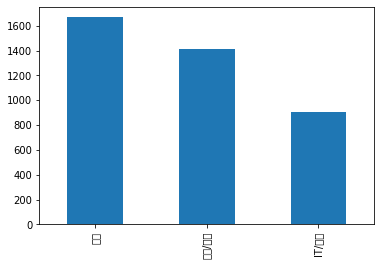

In [45]:
df['code'].value_counts().plot(kind='bar')

In [46]:
df.groupby('code').size().reset_index(name='count')

,code,count
0,IT/과학,903
1,사회,1668
2,생활/문화,1414


# 불용어 제거

In [47]:
stopwords = ['에','는','은','을','했','에게','있','이','의','하','한','다','과','때문','할','수','무단','따른','및','금지','전재','경향신문','기자','는데','가','등','들','파이낸셜','저작','등','뉴스']

In [48]:
def preprocessing(data):
    text_data = []

    for sentence in data:
        temp_data = []
        temp_data = mecab.morphs(sentence)
        temp_data = [word for word in temp_data if not word in stopwords]
        text_data.append(temp_data)

    text_data = list(map(' '.join, text_data))
    return text_data

In [49]:
text_data = preprocessing(df['news'])

# 모델 학습 준비

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [51]:
x_train, x_test, y_train, y_test = train_test_split(text_data, df['code'], random_state=0)

In [52]:
print('훈련용 뉴스 기사의 갯수 :', len(x_train))
print('테스트용 뉴스 기사의 갯수 : ', len(x_test))
print('훈련용 레이블의 갯수 :', len(y_train))
print('테스트용 레이블의 갯수 :', len(y_test))

훈련용 뉴스 기사의 갯수 : 2988
테스트용 뉴스 기사의 갯수 :  997
훈련용 레이블의 갯수 : 2988
테스트용 레이블의 갯수 : 997


In [53]:
# DTM
count_vect = CountVectorizer()
x_train_counts = count_vect.fit_transform(x_train)

# TF-IDF 행렬
tfidf_transformer = TfidfTransformer()
x_train_tfidf = tfidf_transformer.fit_transform(x_train_counts)

In [54]:
print(x_train_tfidf)

  (0, 31555)	0.03630911340953605
  (0, 31494)	0.041443406387489584
  (0, 31492)	0.0415519688254264
  (0, 31398)	0.05592545040561079
  (0, 31271)	0.05987154569662271
  (0, 31191)	0.11081463531898597
  (0, 30764)	0.03687782738418015
  (0, 30640)	0.05835722460508418
  (0, 30638)	0.04912403882091319
  (0, 30622)	0.0405207609995726
  (0, 30269)	0.021549896581596534
  (0, 30267)	0.035909839079011165
  (0, 29493)	0.1562218372995132
  (0, 29307)	0.05835722460508418
  (0, 28914)	0.04670708859076295
  (0, 28772)	0.05592545040561079
  (0, 28710)	0.03554592429187528
  (0, 28650)	0.018301074250990316
  (0, 28574)	0.08143566166187365
  (0, 28534)	0.05706003617548687
  (0, 28367)	0.0627582826637809
  (0, 27764)	0.11081463531898597
  (0, 27325)	0.0690415615023607
  (0, 27215)	0.11796281661585864
  (0, 26245)	0.0510840699946124
  :	:
  (2987, 5056)	0.04647899197890628
  (2987, 4784)	0.06442240011962572
  (2987, 4604)	0.05578582621158117
  (2987, 4538)	0.03738530141946851
  (2987, 3858)	0.05578582621158

In [55]:
# 모델 학습 (나이브베이즈 모델)
clf = MultinomialNB().fit(x_train_tfidf, y_train)

In [56]:
def tfidf_vectorizer(data):
    data_counts = count_vect.transform(data)
    data_tfidf = tfidf_transformer.transform(data_counts)
    return data_tfidf

In [57]:
new_sent = preprocessing(["민주당 일각에서 법사위의 체계·자구 심사 기능을 없애야 한다는 \
                           주장이 나오는데 대해 “체계·자구 심사가 법안 지연의 수단으로 \
                          쓰이는 것은 바람직하지 않다”면서도 “국회를 통과하는 법안 중 위헌\
                          법률이 1년에 10건 넘게 나온다. 그런데 체계·자구 심사까지 없애면 매우 위험하다”고 반박했다."           
])

In [58]:
print(clf.predict(tfidf_vectorizer(new_sent)))

['사회']


In [59]:
new_sent = preprocessing(["20분기 연속으로 적자에 시달리는 LG전자가 브랜드 이름부터 성능, 디자인까지 대대적인 변화를 \
                          적용한 LG 벨벳은 등장 전부터 온라인 커뮤니티를 뜨겁게 달궜다. 사용자들은 “디자인이 예쁘다”, \
                          “슬림하다”는 반응을 보이며 LG 벨벳에 대한 기대감을 드러냈다."  
])

In [60]:
print(clf.predict(tfidf_vectorizer(new_sent)))

['IT/과학']


In [61]:
y_pred = clf.predict(tfidf_vectorizer(x_test))
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       IT/과학       0.92      0.78      0.84       227
          사회       0.78      0.91      0.84       437
       생활/문화       0.84      0.75      0.79       333

    accuracy                           0.83       997
   macro avg       0.85      0.81      0.82       997
weighted avg       0.83      0.83      0.82       997

